In [0]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [5]:
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
X_train.shape

(34799, 32, 32, 3)

In [9]:
X_train.shape[1:]

(32, 32, 3)

In [0]:
input_shape = X_train.shape[1:]

In [11]:
y_train.shape

(34799, 43)

In [12]:
y_train.shape[1]

43

In [0]:
num_classes = y_train.shape[1]

In [14]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

  Flatten(),

  Dense(num_classes, activation='softmax'),

])

#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 4s 3ms/step - loss: 9.5718 - accuracy: 0.7873


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax'),

  ])

def train_model(model, X_train, y_train):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  model.fit(X_train, y_train)


In [16]:
model = get_cnn_v1(input_shape, num_classes)
train_model(model, X_train, y_train)

1088/1088 [==============================] - 4s 3ms/step - loss: 9.7229 - accuracy: 0.7853


In [0]:
logdir = os.path.join('logs', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [0]:
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks=[tensorboard_callback]
  )

  return model

In [19]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 30.7144 - accuracy: 0.7456 - val_loss: 0.3048 - val_accuracy: 0.9294
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2065 - accuracy: 0.9531 - val_loss: 0.1326 - val_accuracy: 0.9694
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1170 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9799
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1036 - accuracy: 0.9758 - val_loss: 0.0894 - val_accuracy: 0.9787
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.0908 - accuracy: 0.9804 - val_loss: 0.0649 - val_accuracy: 0.9844


In [20]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[4.8267532e-11, 6.5077032e-04, 7.6522454e-05, ..., 3.2744577e-04,
        4.2589328e-09, 1.9532857e-07],
       [6.0161285e-09, 2.7880757e-05, 6.1676228e-06, ..., 1.5549184e-04,
        9.7552782e-12, 3.4096221e-09],
       [4.0217053e-12, 1.5496189e-04, 3.6593854e-06, ..., 3.6835644e-04,
        9.6075560e-08, 1.2062740e-07],
       ...,
       [2.8575197e-04, 8.2048886e-03, 1.3016168e-03, ..., 2.1890160e-03,
        4.9913960e-04, 7.8763434e-04],
       [3.4902297e-04, 1.4303267e-02, 2.0945524e-03, ..., 3.9074300e-03,
        1.0825342e-03, 3.5239365e-03],
       [3.7412265e-05, 1.9991950e-03, 1.1483324e-03, ..., 4.8490224e-04,
        1.5375482e-04, 1.8395338e-04]], dtype=float32)

In [21]:
y_pred_prob[366]

array([1.0726849e-23, 9.9998987e-01, 5.6504587e-07, 1.3948636e-09,
       2.9744834e-07, 9.1131360e-06, 3.4833898e-23, 1.5507563e-08,
       6.8270445e-08, 1.8655564e-15, 4.8811131e-17, 5.5950069e-13,
       1.6246304e-30, 8.7331378e-27, 2.6820794e-23, 1.4440486e-25,
       5.5159527e-27, 1.6400193e-27, 1.5553589e-20, 3.8727822e-33,
       7.6272966e-27, 1.1951364e-26, 2.6400544e-23, 1.9991748e-31,
       2.4334286e-14, 1.3577871e-11, 1.1119368e-15, 1.6863036e-29,
       5.2881521e-20, 4.1716492e-23, 5.5271162e-27, 2.5944470e-13,
       4.2515416e-31, 5.9309565e-18, 4.4597447e-23, 2.9543118e-28,
       1.3633144e-30, 1.0350600e-30, 6.4069495e-26, 0.0000000e+00,
       1.1459151e-18, 1.6461227e-36, 4.0187244e-25], dtype=float32)

In [22]:
np.sum( [5.5845096e-24, 1.0000000e+00, 7.7911516e-10, 2.5424228e-14,
       4.3850044e-09, 1.0303246e-13, 0.0000000e+00, 5.0343949e-18,
       1.2801764e-15, 1.3135931e-11, 2.9755335e-23, 6.2455630e-22,
       0.0000000e+00, 1.1146773e-25, 7.0538393e-36, 1.5694293e-19,
       1.9300622e-27, 0.0000000e+00, 2.0873049e-31, 0.0000000e+00,
       2.3147861e-30, 1.8167500e-31, 6.6637808e-29, 0.0000000e+00,
       2.0373923e-21, 1.1271396e-21, 3.4605429e-28, 1.1383400e-28,
       4.5074713e-32, 1.9573885e-31, 8.2343503e-30, 1.3437054e-19,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.1021466e-32,
       1.1711551e-28, 0.0000000e+00, 5.9251024e-37, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00])

1.0000000051773852

In [23]:
np.argmax( y_pred_prob[366] )

1

<BarContainer object of 43 artists>

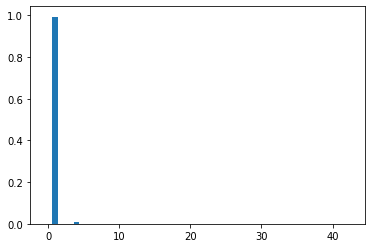

In [24]:
plt.bar( range(43), y_pred_prob[400] )

In [26]:
df = pd.read_csv('data/signnames.csv')
df.to_dict()['b']

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [0]:
labels_dict = df.to_dict()['b']

In [28]:
labels_dict[ 1 ]

'Speed limit (30km/h)'

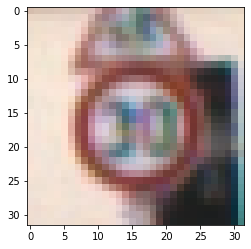

In [29]:
plt.imshow(X_test[366])

In [30]:
labels_dict[ np.argmax( y_pred_prob[366] ) ]

'Speed limit (30km/h)'

In [0]:
ls data

signnames.csv  test.p  train.p


In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)


In [33]:
predict(model_trained, X_test, y_test)

0.819047619047619

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return  predict(model_trained, X_test, y_test)

In [37]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
  
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict( get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 6.8802 - accuracy: 0.2605 - val_loss: 1.5607 - val_accuracy: 0.5858
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 1.2517 - accuracy: 0.6330 - val_loss: 0.4686 - val_accuracy: 0.8797
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.6803 - accuracy: 0.7996 - val_loss: 0.2133 - val_accuracy: 0.9474
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.4503 - accuracy: 0.8672 - val_loss: 0.1090 - val_accuracy: 0.9755
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.3314 - accuracy: 0.9044 - val_loss: 0.0689 - val_accuracy: 0.9851


0.8945578231292517

In [38]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
  
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict( get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.1320 - accuracy: 0.5720 - val_loss: 0.3267 - val_accuracy: 0.9318
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 0.4967 - accuracy: 0.8548 - val_loss: 0.1100 - val_accuracy: 0.9742
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2971 - accuracy: 0.9133 - val_loss: 0.0796 - val_accuracy: 0.9838
Epoch 4/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2205 - accuracy: 0.9342 - val_loss: 0.0424 - val_accuracy: 0.9918
Epoch 5/5
272/272 [==============================] - 3s 13ms/step - loss: 0.1706 - accuracy: 0.9497 - val_loss: 0.0316 - val_accuracy: 0.9928


0.9734693877551021

In [39]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
  
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict( get_cnn_v4(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.8993 - accuracy: 0.2635 - val_loss: 1.3696 - val_accuracy: 0.5819
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 1.1762 - accuracy: 0.6288 - val_loss: 0.4445 - val_accuracy: 0.8817
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.5840 - accuracy: 0.8163 - val_loss: 0.1721 - val_accuracy: 0.9546
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3675 - accuracy: 0.8877 - val_loss: 0.0983 - val_accuracy: 0.9763
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2648 - accuracy: 0.9193 - val_loss: 0.0629 - val_accuracy: 0.9844


0.953968253968254

In [40]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
  
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict( get_cnn_v5(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.5265 - accuracy: 0.3042 - val_loss: 1.0412 - val_accuracy: 0.6761
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.9541 - accuracy: 0.6919 - val_loss: 0.3303 - val_accuracy: 0.8874
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4963 - accuracy: 0.8409 - val_loss: 0.1297 - val_accuracy: 0.9599
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.3407 - accuracy: 0.8940 - val_loss: 0.0972 - val_accuracy: 0.9709
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2413 - accuracy: 0.9257 - val_loss: 0.0543 - val_accuracy: 0.9847


0.9659863945578231

In [41]:
X_train[0].shape

(32, 32, 3)

In [46]:
color.rgb2gray( X_train[0] ).shape

(32, 32)

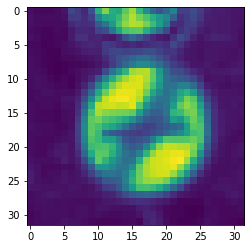

In [43]:
plt.imshow( color.rgb2gray( X_train[0] ) )

In [47]:
color.rgb2gray( X_train ).shape

(34799, 32, 32)

In [0]:
X_train_gray = color.rgb2gray( X_train ).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray( X_test ).reshape(-1, 32, 32, 1)

In [56]:
model = get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.3854 - accuracy: 0.3122 - val_loss: 0.7049 - val_accuracy: 0.7636
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.5354 - accuracy: 0.8246 - val_loss: 0.1558 - val_accuracy: 0.9530
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2546 - accuracy: 0.9177 - val_loss: 0.0638 - val_accuracy: 0.9807
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1698 - accuracy: 0.9470 - val_loss: 0.0317 - val_accuracy: 0.9911
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1259 - accuracy: 0.9609 - val_loss: 0.0238 - val_accuracy: 0.9930


0.9748299319727891

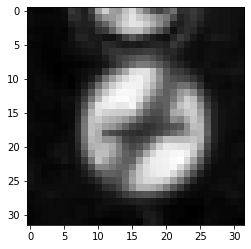

In [44]:
plt.imshow( color.rgb2gray( X_train[0] ), cmap=plt.get_cmap('gray') )

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
  img = color.hsv2rgb(hsv)

  return img

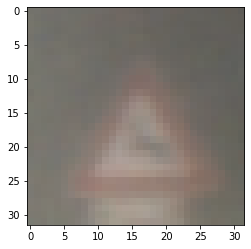

In [58]:
plt.imshow( X_train[400] )

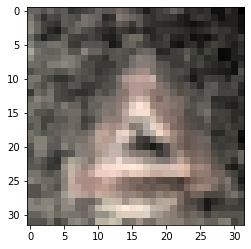

In [59]:
plt.imshow( preproc_img(X_train[400]) )